In [2]:
import pybamm
import matplotlib.pyplot as plt

In [3]:
model = pybamm.lithium_sulfur.MarinescuEtAl2016()

param = model.default_parameter_values
#param["Current function [A]"] = 1.7

In [4]:
solver = pybamm.ScikitsDaeSolver()
sim = pybamm.Simulation(model, parameter_values=param, solver=solver)

Final time 12000.0s k


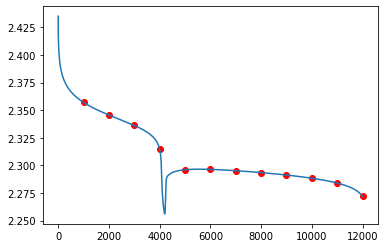

In [5]:
tstep = 1000
npts = 1000

error = False 

while error is False:
    try:
        solution = sim.step(tstep, npts=npts)
        t = solution.t
        V = solution["Terminal voltage [V]"].entries
        plt.plot(t[-1], V[-1], 'ro')
    except pybamm.SolverError:
        error = True
        t = solution.t
        V = solution["Terminal voltage [V]"].entries
        plt.plot(t, V)        
        print("Final time {}s".format(solution.t[-1]),'k')

In [6]:
sim.plot(model.variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=3.3333333333333335, step=0.03333333333333333…